In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 10]

In [2]:
def fix_if_beyond_limits(logs, interval_low, interval_high, contour_value):

    duplicates = [x for x in logs if logs.count(x) > 1]
    
    low_mask = np.logical_or(np.array(logs) < interval_low, np.isin(logs, duplicates))
    logs = np.where(low_mask, interval_low + np.cumsum(low_mask) * contour_value, logs)
    
    high_mask = np.logical_or(np.array(logs) > interval_high, np.isin(logs, duplicates))
    logs = np.where(high_mask, interval_high - np.cumsum(high_mask) * contour_value, logs)
    
    return logs

In [3]:
def quadratic_fit_search(objective_function, low, mid, high, max_evals, contour_value):
    
    iteractions = []
    ys = []
    xs = []
    
    interval_low, interval_high = low, high
    
    for evaluation in range(0, max_evals + 1):
        
        logs = [low, mid, high]
        fixed_logs = fix_if_beyond_limits(logs, interval_low, interval_high, contour_value)
        low, mid, high = fixed_logs[0], fixed_logs[1], fixed_logs[2]
        
        y_low = objective_function(low)
        y_mid = objective_function(mid)
        y_high = objective_function(high)
        
        numerator = y_low * (mid**2 - high**2) + y_mid * (high**2 - low**2) + y_high * (low**2 - mid**2)
        denominator = y_low * (mid - high) + y_mid * (high - low) + y_high * (low - mid)
        x = .5 * numerator / denominator        
        
        if x < interval_low:
            x = interval_low
        elif x > interval_high:
            x = interval_high
            
        y = objective_function(x)
        
        iteractions.append([low, mid, high, y_low, y_mid, y_high, x, y])
                
        if x > mid:
            if y > y_mid:
                y_high, high = y, x
            else:
                y_low, low, y_mid, mid = y_mid, mid, y, x
        elif x < mid:
            if y > y_mid:
                ylow, low = y, x
            else:
                y_high, high, y_mid, mid = y_mid, mid, y, x
        
        ys.append(y)
        xs.append(x)
        
    return ys, xs, iteractions

In [4]:
def objective_function(input_data):
    return np.cos(np.radians(input_data))

In [5]:
outputs = []
search_interval = np.linspace(-250, -10, 100)
for input_data in search_interval:
    outputs.append(objective_function(input_data))

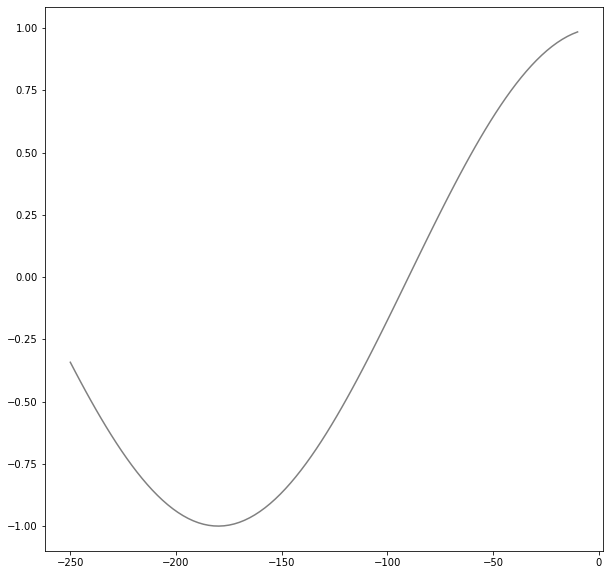

In [6]:
plt.plot(search_interval, outputs, c='.5')

In [7]:
low = np.min(search_interval)
high = np.max(search_interval)
mid = low + (high - low) / 2
max_evals =  4

contour_value = 10e-5
ys, xs, iteractions = quadratic_fit_search(objective_function, low, mid, high, max_evals, contour_value)

In [8]:
def quadratic_function(x_i, y_i, x):
    
    low = x_i[0]
    mid = x_i[1]
    high = x_i[2]
    
    y_low = y_i[0]
    y_mid = y_i[1]
    y_high = y_i[2]
    
    t1 = ((x - mid) * (x - high)) / ((low - mid) * (low - high))
    t2 = ((x - low) * (x - high)) / ((mid - low) * (mid - high))
    t3 = ((x - low) * (x - mid)) / ((high - low) * (high - mid))
    
    quadratic = y_low * t1 + y_mid * t2 + y_high * t3
    
    return quadratic

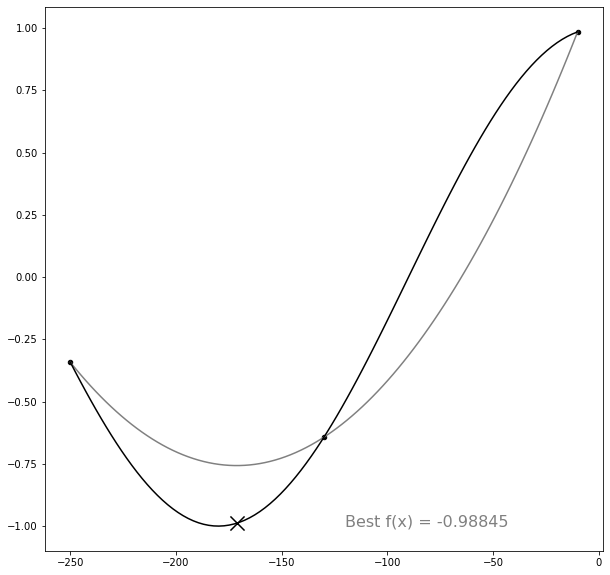

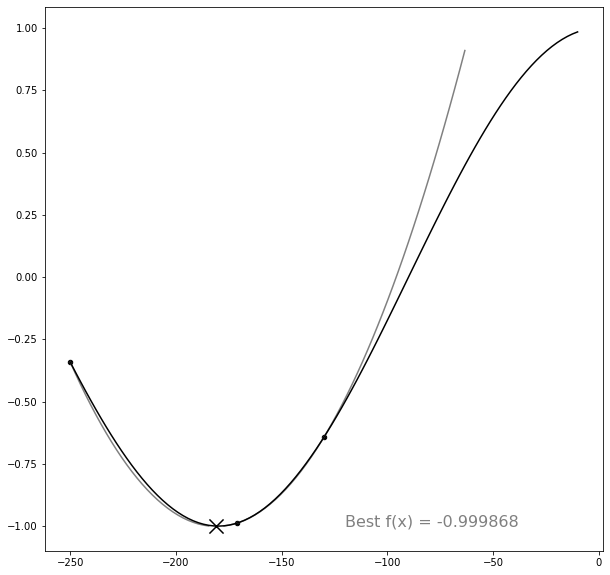

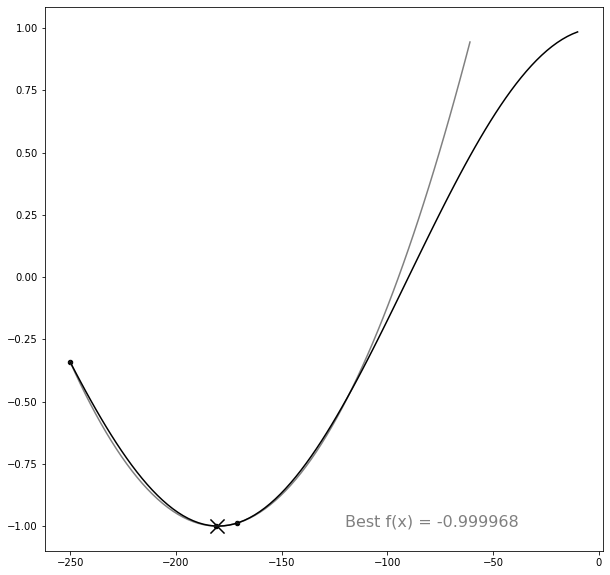

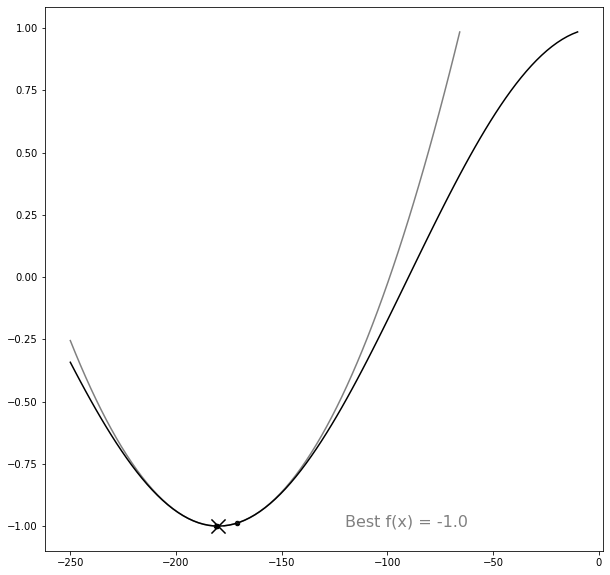

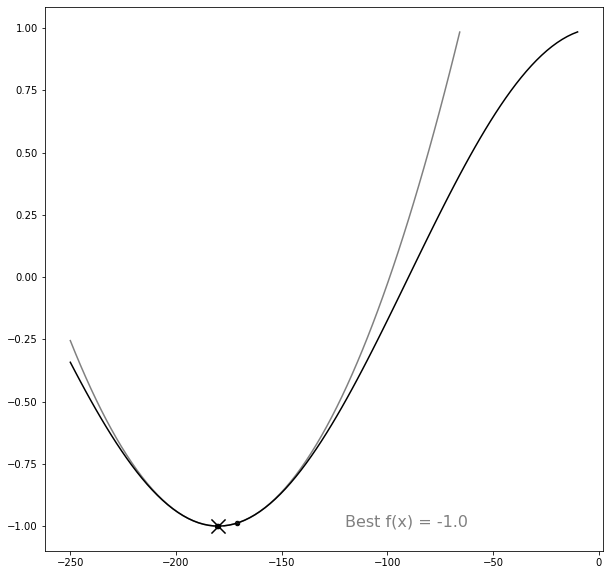

In [9]:
for i in iteractions:
    
    x_i = i[0:3]
    y_i = i[3:6]
    x_best = i[6]
    y_best = i[7]
    
    quadratic_outputs = []
    for item in search_interval:
        quadratic_outputs.append(quadratic_function(x_i, y_i, item))
    
    quadratic_outputs = np.where(quadratic_outputs > np.max(outputs), np.nan, quadratic_outputs)
    quadratic_outputs = np.where(quadratic_outputs < np.min(outputs), np.nan, quadratic_outputs)
    
    plt.plot(search_interval, quadratic_outputs, c='.5')
    plt.scatter(x_i, y_i, c='0', s=20)
    plt.scatter(x_best, y_best, c='0', marker='x', s=200)
    plt.plot(search_interval, outputs, c='0')
    ###
    plt.text(-120, -1, f'Best f(x) = {np.round(y_best, 6)}', fontsize = 16, color='.5')
    ###
    plt.show()

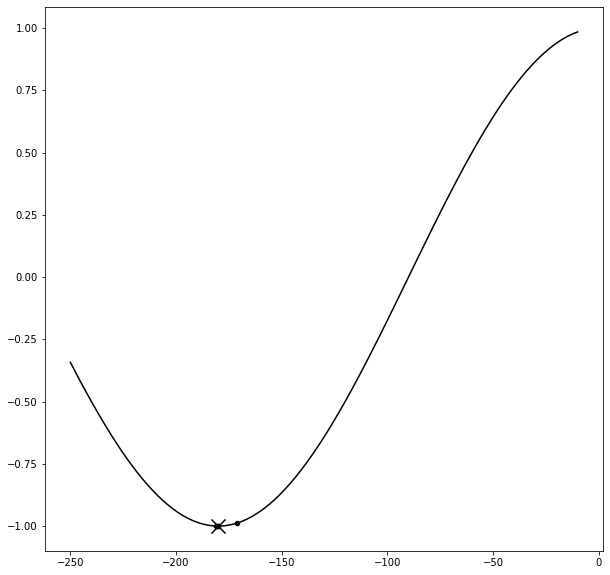

In [10]:
plt.scatter(xs, ys, c='0', s=20)
plt.scatter([xs[np.argmin(ys)]], [np.min(ys)], c='0', marker='x', s=200)
plt.plot(search_interval, outputs, c='0')
plt.show()

In [14]:
filenames = []

for idx, i in enumerate(iteractions):
    
    x_i = i[0:3]
    y_i = i[3:6]
    x_best = i[6]
    y_best = i[7]
    
    quadratic_outputs = []
    for item in search_interval:
        quadratic_outputs.append(quadratic_function(x_i, y_i, item))
    
    quadratic_outputs = np.where(quadratic_outputs > np.max(outputs), np.nan, quadratic_outputs)
    quadratic_outputs = np.where(quadratic_outputs < np.min(outputs), np.nan, quadratic_outputs)
    
    plt.plot(search_interval, quadratic_outputs, c='.5')
    plt.scatter(x_i, y_i, c='0', s=20)
    plt.scatter(x_best, y_best, c='0', marker='x', s=200)
    plt.plot(search_interval, outputs, c='0')
    plt.text(-120, -1, f'Best f(x) = {np.round(y_best, 6)}', fontsize = 16, color='.5')
    #plt.show()
    
    # create file name and append it to a list
    filename = f'{i}.png'
    for i in range(5):
        filenames.append(filename)
    filenames.append(filename)
    
    # save frame
    plt.savefig(filename)
    plt.close()
    
# build gif
with imageio.get_writer('quadratic_fit_search.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        
# build gif
with imageio.get_writer('quadratic_fit_search.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)